### Национальные чемпионы

In [47]:
from pfp_products import *
from pfp_optimization import *
from pfp_stat import *
import matplotlib.pyplot as plt

# set constants & assumbtions
n_scenarios = 10000
simulation_years = 10         #years

points_in_year = 12
assumptions = pd.DataFrame(index = {'SPX Index', 'NKY Index'}, data = {'return': [0.2, 0.1]} )

dates = np.arange(points_in_year - 1, points_in_year*5 +1, points_in_year)

#5 лет, барьер 50%, купон 8.4%, без памяти

mass_names = ['SBER RX EQUITY',
        'GAZP RX EQUITY',
        'GMKN RX EQUITY',
        'LKOH RX EQUITY',
        'MGNT RX EQUITY',
        'ROSN RX EQUITY',
        'ALRS RX EQUITY',
        'AFLT RX EQUITY',
        'MOEX RX EQUITY',
        'VTBR RX EQUITY']

mass_prices = ba_scenarios(mass_names, simulation_years, points_in_year, n_scenarios, assumptions, 0)

coupon_trigger = (mass_prices[dates,:,:] > 0.5).sum(axis = 2) == len(mass_names)
coupon = np.ones(coupon_trigger.shape).cumsum(axis = 0) == coupon_trigger.cumsum(axis = 0)
coupons = coupon.sum(axis = 0)

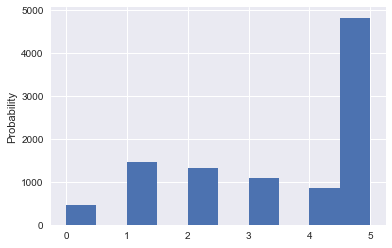

In [50]:
plt.hist(coupons, normed=False, bins=10)
plt.ylabel('Probability');
plt.show()